In [1]:
# ---------Raman Analysis ---------#

import pandas as pd # python data manipulation and analysis library
import numpy as np #  Library with large collection of high-level mathematical functions to operate on arrays
import matplotlib.pyplot as plt #python plotting library

from scipy.optimize import curve_fit
import os # Library with operating system dependent functionality. Example: Reading data from files on the computer
import csv

In [2]:

#Lorentzian functions to which baseline subtracted data is fitted
# Learn more: https://lmfit.github.io/lmfit-py/builtin_models.html
def lorentzian_fcn(x, I, x0, gamma):
    return I*((gamma**2)/(((x-x0)**2)+gamma**2))

def two_lorentzian(x, I1, x1, gamma1, I2, x2, gamma2, y0):
    return lorentzian_fcn(x, I1, x1, gamma1) + lorentzian_fcn(x, I2, x2, gamma2) + y0

In [105]:
# -------- Reading data from .csv files
path = '../data/Alex/data/'
fname = '2019-02-17  GO20_s1_lp400mW_dur600ms_p70psi.csv'
datafn = path + fname
bgrfn = path + '2019-02-18  GO20_bgr.csv'
data = pd.read_csv(datafn, header = 0, index_col = 0, names = ['W', 'I'])
bgr = pd.read_csv(bgrfn, header = 0, index_col = 0, names = ['W', 'I'])

In [106]:
data_proc = (data.I.values - bgr.I.values)

data_index = data.index.values
data_proc = pd.DataFrame({'I': data_proc}, index = data_index)
data_proc = data_proc[569:585]

lowval, hival = data_proc[data_proc.index.min():data_proc.index.min() + 2].values.mean(), data_proc[data_proc.index.max() - 2:data_proc.index.max()].values.mean()
low, hi = data_proc[data_proc.index.min():data_proc.index.min() + 2].index.values.mean(), data_proc[data_proc.index.max() - 2:data_proc.index.max()].index.values.mean()

y = [lowval, hival]
x = [low, hi]
m, b = np.polyfit(x, y, 1)

data_index = data_proc.index.values
data_proc = data_proc.I.values - (data_proc.index.values * m + b)
data_proc = pd.DataFrame({'I': data_proc}, index = data_index)

The G/D ratio is 1.03960507358796


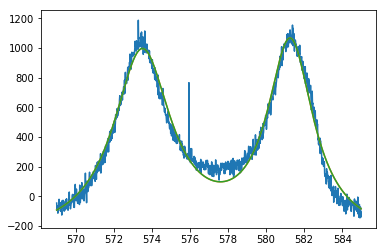

In [107]:
prms = [2000, 573, 1, 6000, 581.5, 0.5, 5000]   #prms = [I1, x1, gamma1, I2, x2, gamma2, y0]

#Optimal values for the prms are returned in array form via popt after lorentzian curve_fit 
popt, pcov = curve_fit(two_lorentzian, data_proc.index.values, data_proc.I.values, p0 = prms)

#Fit data is computed by passing optimal prms and x-values to two_lorentzian function
data_proc['fit'] = two_lorentzian(data_proc.index, *popt)

#G/D ratios are simply calculated by optimal_I2/optimal_I1 
ratios = popt[3]/popt[0]

plt.plot(data_proc)
plt.plot(data_proc.fit)

# Saving plot result
#plt.savefig('12-06-18 GO spot1 Raman.png', bbox_inches='tight')

# Quick-view of results
#plt.show()
print("The G/D ratio is", ratios)

In [108]:
popt  # I1, x1, gamma1, I2, x2, gamma2, y0

array([1242.92099192,  573.49742037,    1.84628203, 1292.14696926,
        581.27106713,    1.47497239, -290.41561773])

In [50]:
import os
import csv

In [134]:
power = input('Power: ')
time = input('time: ')
pressure = input('Pressure: ')
D = popt[0]
G = popt[3]
ratio = popt[0]/popt[3]

Power: awesome
time: shit
Pressure: happening


In [135]:
list1=[power, time, pressure, D, G, ratio]

with open("output_1.csv", "a") as fp:
    wr = csv.writer(fp, dialect='excel')
    wr.writerow(list1)

In [13]:
os.makedirs('test_01',exist_ok=True)

In [21]:
output_path = 'test_01'
os.makedirs(output_path,exist_ok=True)